In [60]:
import pandas as pd 
import numpy as np
import time
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, KFold
import seaborn as sns

In [61]:
train=pd.read_csv('/Users/tarunayroy/Desktop/Machine Learning 2/Project/train.csv')

In [44]:
train['problem_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [45]:
train['target'].value_counts()

0    4124
1    3175
2     729
3     255
4      19
Name: target, dtype: int64

/Users/tarunayroy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

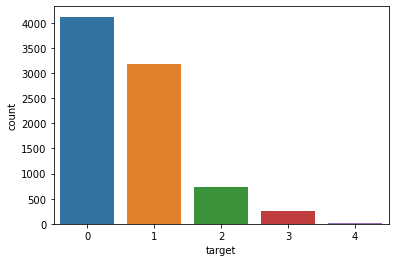

In [5]:
sns.countplot(train['target'])

/Users/tarunayroy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='problem_id', ylabel='count'>

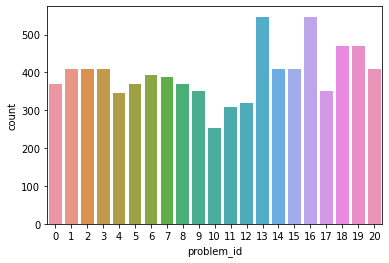

In [6]:
sns.countplot(train['problem_id'])

In [7]:
train.head()

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v969,v970,v971,v972,v973,v974,v975,v976,v977,target
0,0,0.35,0.36,0.77,0.42,0.48,0.12,0.43,0.49,0.19,...,0.77,0.57,0.56,0.40,0.75,0.08,0.14,0.43,0.88,0
1,0,0.12,0.17,0.38,0.43,0.57,0.09,0.11,0.58,0.35,...,0.07,0.59,0.06,0.17,0.09,0.04,0.04,0.45,0.14,1
2,0,0.67,0.16,0.85,0.41,0.57,0.27,0.83,0.73,0.26,...,0.24,0.42,0.57,0.58,0.37,0.01,0.10,0.38,0.06,1
3,0,0.70,0.20,0.62,0.41,0.41,0.10,0.80,0.52,0.82,...,0.04,0.52,0.25,0.07,0.23,0.04,0.76,0.41,0.59,1
4,0,0.72,0.75,0.74,0.42,0.41,0.76,0.34,0.72,0.06,...,0.81,0.41,0.16,0.03,0.21,0.10,0.12,0.53,0.30,1


In [8]:
X = train.iloc[:, 0:-1]
y = train.iloc[:, -1]

In [9]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,stratify=y,random_state=69)

In [82]:
# fit vanilla XgBoost model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/tarunayroy/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
## Decreasing the learning rate and oncreasing the scale_pos_weight to account for weight imbalance
model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='mlogloss', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=300, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
model.fit(X_train, y_train)

[19:19:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:19:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=300, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
y_pred = model.predict(X_val)
predictions = [round(value) for value in y_pred]

In [82]:
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.31%


### Fitting on Full dataset

In [14]:
model.fit(X, y)

[19:27:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=300, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
## Trying target encoding
from sklearn.model_selection import KFold

def reg_target_encoding(train, col="device_type", target="click", splits=5):
    """ Computes regularize mean encoding.
    Inputs:
       train: training dataframe
       
    """
    train.reset_index(inplace=True,drop=True)
    kf = KFold(n_splits=splits, shuffle=False)
    new_col = col + "_" + "mean_enc"
    train.loc[:,new_col]=np.NaN
    ### BEGIN SOLUTION
    for train_index,test_index in kf.split(train):
        col_mean=train.loc[train_index].groupby([col])[target].mean()
        train.loc[test_index,new_col]=train.loc[test_index,col].map(col_mean)

    global_mean = train.loc[:, target].mean()
    train[new_col].fillna(global_mean,inplace=True)
def mean_encoding_test(test, train, col="device_type", target="click"):
    """ Computes target enconding for test data.

    This is similar to how we do validation
    """
    new_col = col + "_" + "mean_enc"
    ### BEGIN SOLUTION
    mean_col=train.groupby(col)[target].mean()
    global_mean=train[target].mean()
    train[new_col]=train[col].map(mean_col)
    test[new_col]=test[col].map(mean_col)
    train[new_col].fillna(global_mean,inplace=True)
    test[new_col].fillna(global_mean,inplace=True)

In [63]:
reg_target_encoding(train,col="problem_id",target='target',splits=10)

In [83]:
## Ran the model with mean target encoding

In [64]:
X = train.drop(columns=['target','problem_id'])
y = train.iloc[:, -2]

In [65]:
model.fit(X, y)

/Users/tarunayroy/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=300, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
test=pd.read_csv('/Users/tarunayroy/Desktop/Machine Learning 2/Project/test.csv')
mean_encoding_test(test, train, col="problem_id", target="target")

In [74]:
X_test = test.drop(columns=['target','problem_id','obs_id'])
y = test.iloc[:, -2]

In [75]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [76]:
submission=pd.DataFrame(predictions,columns=['target'])

In [78]:
submission=submission.reset_index()

In [80]:
submission=submission.rename(columns={"index":"obs_id"})

In [81]:
submission.to_csv("third_submission.csv",index=False)